In [24]:
!pip install langgraph

In [25]:
!pip install langchain langchain_groq langchain_community

In [26]:
import os
from google.colab import userdata

api=userdata.get('grok_api')




In [27]:
from langchain_groq import ChatGroq

llm=ChatGroq(api_key=api,model="gemma2-9b-it")

In [28]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages



In [29]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [30]:
def bot(state:State):
  return {"messages":llm.invoke(state["messages"])}

In [31]:
graph_builder.add_node("Chatbot",bot)
graph_builder.add_edge(START,"Chatbot")
graph_builder.add_edge("Chatbot",END)

In [32]:
graph=graph_builder.compile()

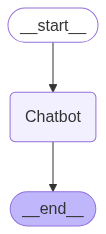

In [33]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except:
  Pass

In [34]:
while True:
  ip = input("User: ")
  if ip.lower()=="q":
    print("SeeYaaa !!")
    break

  for e in graph.stream({"messages":("user",ip)}):
    print(e.values())
    for val in e.values():
      print(val['messages'])
      print("Bot",val['messages'].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋 \n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 0.001176769, 'queue_time': 0.070449186, 'total_time': 0.030267678}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d3972f16-7927-49a5-b508-95320ad4332a-0', usage_metadata={'input_tokens': 10, 'output_tokens': 16, 'total_tokens': 26})}])
content='Hello! 👋 \n\nHow can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 0.001176769, 'queue_time': 0.070449186, 'total_time': 0.030267678}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand',